# Importing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv('vgsales.csv')

In [4]:
print(data.shape)
data.head()

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Clean Data

In [5]:
#Drop null values (the nulls are from years after 2016)
data = data.dropna()

In [6]:
#Check duplicate names
pd.concat(g for _, g in data.groupby("Name") if len(g) > 1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1273,1275,007: Quantum of Solace,X360,2008.0,Action,Activision,0.82,0.52,0.01,0.14,1.49
1739,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.52,0.02,0.20,1.16
3038,3040,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.30,0.29,0.01,0.07,0.67
4499,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0.00,0.00,0.26,0.43
9318,9320,007: Quantum of Solace,DS,2008.0,Action,Activision,0.11,0.01,0.00,0.01,0.14
...,...,...,...,...,...,...,...,...,...,...,...
4685,4687,pro evolution soccer 2011,PS2,2010.0,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11,0.41
7088,7090,pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,0.08,0.10,0.03,0.02,0.23
12605,12607,pro evolution soccer 2011,PC,2010.0,Sports,Konami Digital Entertainment,0.00,0.05,0.00,0.01,0.06
7835,7837,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,0.08,0.09,0.00,0.02,0.19


In [7]:
#Make a copy with no platforms
df = data.copy()
df = data.drop(['Platform'], axis=1)

In [8]:
#Sum all duplicate games together
df = df.groupby('Name').agg({'Rank':'first', 
                               'Year':'first', 
                               'Genre':'first',
                               'Publisher':'first',
                                'NA_Sales':'sum',
                                'EU_Sales':'sum',
                                'JP_Sales':'sum',
                                'Other_Sales':'sum',
                                'Global_Sales':'sum'}).reset_index()

In [9]:
#Check number of datapoints after aggregating
df.shape

(11325, 10)

In [10]:
#Rank is no longer accurate for this dataset, drop and reorder by global_sales
df = df.drop(['Rank'], axis=1)
df = df.sort_values(by=['Global_Sales'], ascending=False)

In [11]:
df.head()

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10849,Wii Sports,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3650,Grand Theft Auto V,2013.0,Action,Take-Two Interactive,23.46,23.04,1.39,8.03,55.92
9201,Super Mario Bros.,1985.0,Platform,Nintendo,32.48,4.88,6.96,0.99,45.31
9581,Tetris,1989.0,Puzzle,Nintendo,26.17,2.95,6.03,0.69,35.84
5493,Mario Kart Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


# EDA

## Question 1: Which Genres are the most successful in terms of Global Sales?

In [12]:
#Groupby Platform, Aggregate the Global Sales
GenreSum = df.groupby('Genre').agg({'Global_Sales':'sum'}).reset_index()

In [13]:
#Groupby to order category for graph
gr = GenreSum.groupby(["Genre"])['Global_Sales'].aggregate(np.mean).reset_index().sort_values('Global_Sales', ascending=False)

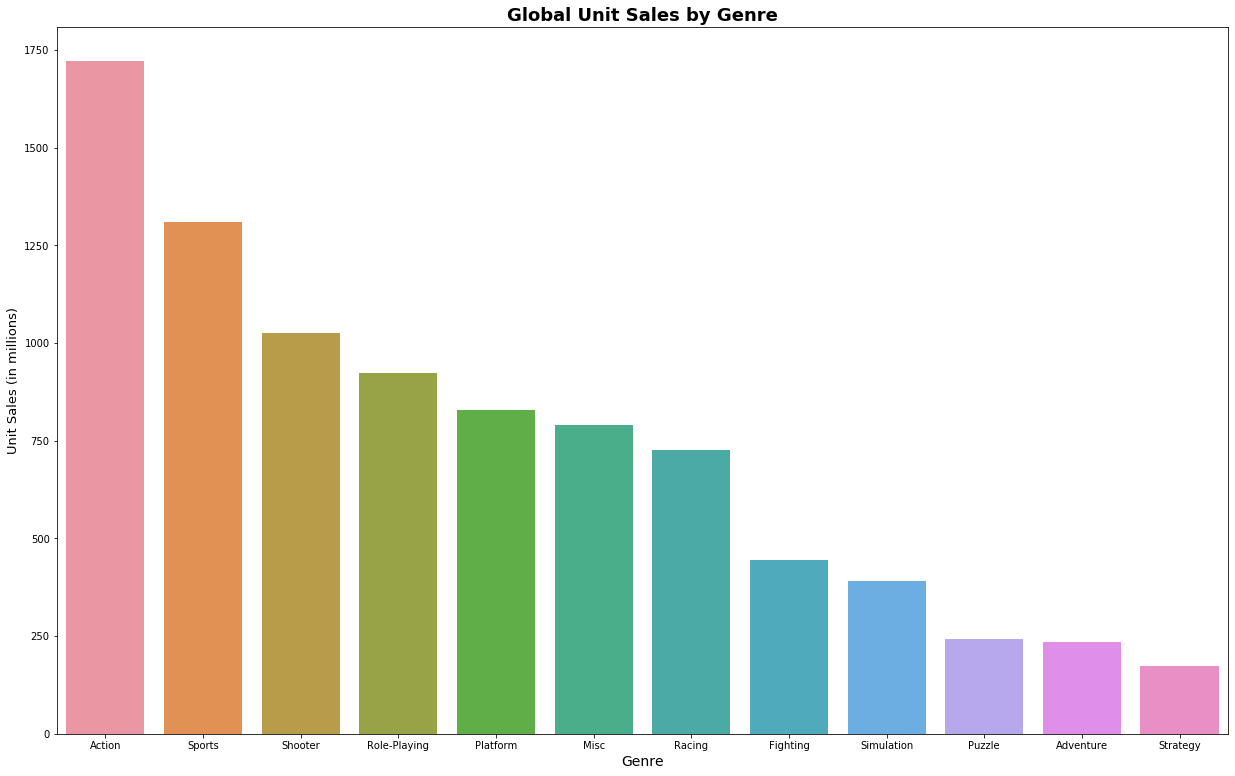

In [14]:
plt.figure(figsize=(21,13))
sns.barplot(x="Genre", y="Global_Sales", data=GenreSum, order=gr['Genre'])
plt.title('Global Unit Sales by Genre', fontweight='bold',fontsize=18)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Unit Sales (in millions)',fontsize=13)
plt.show()

## Question 2: Which Genres are most successful based on Region?

### North America

In [15]:
#Groupby Platform, Aggregate the Global Sales
NAGSum = df.groupby('Genre').agg({'NA_Sales':'sum'}).reset_index()

In [16]:
#Groupby to order category for graph
#NAS = df.groupby(["Genre"])['NA_Sales'].aggregate(np.mean).reset_index().sort_values('NA_Sales', ascending=False)

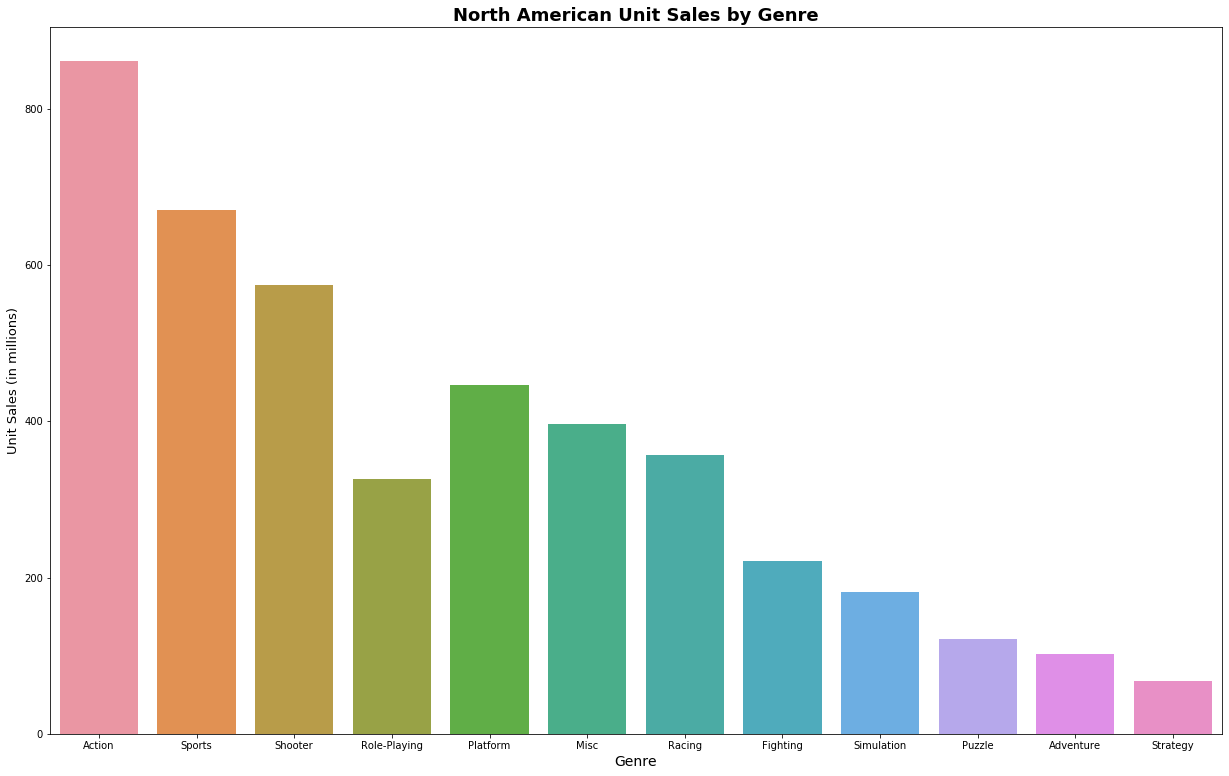

In [17]:
plt.figure(figsize=(21,13))
sns.barplot(x="Genre", y="NA_Sales", data=NAGSum, order=gr['Genre'])
plt.title('North American Unit Sales by Genre', fontweight='bold',fontsize=18)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Unit Sales (in millions)',fontsize=13)
plt.show()

### Europe

In [18]:
#Groupby Platform, Aggregate the Global Sales
EUGSum = df.groupby('Genre').agg({'EU_Sales':'sum'}).reset_index()

In [19]:
#Groupby to order category for graph
#EUS = df.groupby(["Genre"])['EU_Sales'].aggregate(np.mean).reset_index().sort_values('EU_Sales', ascending=False)

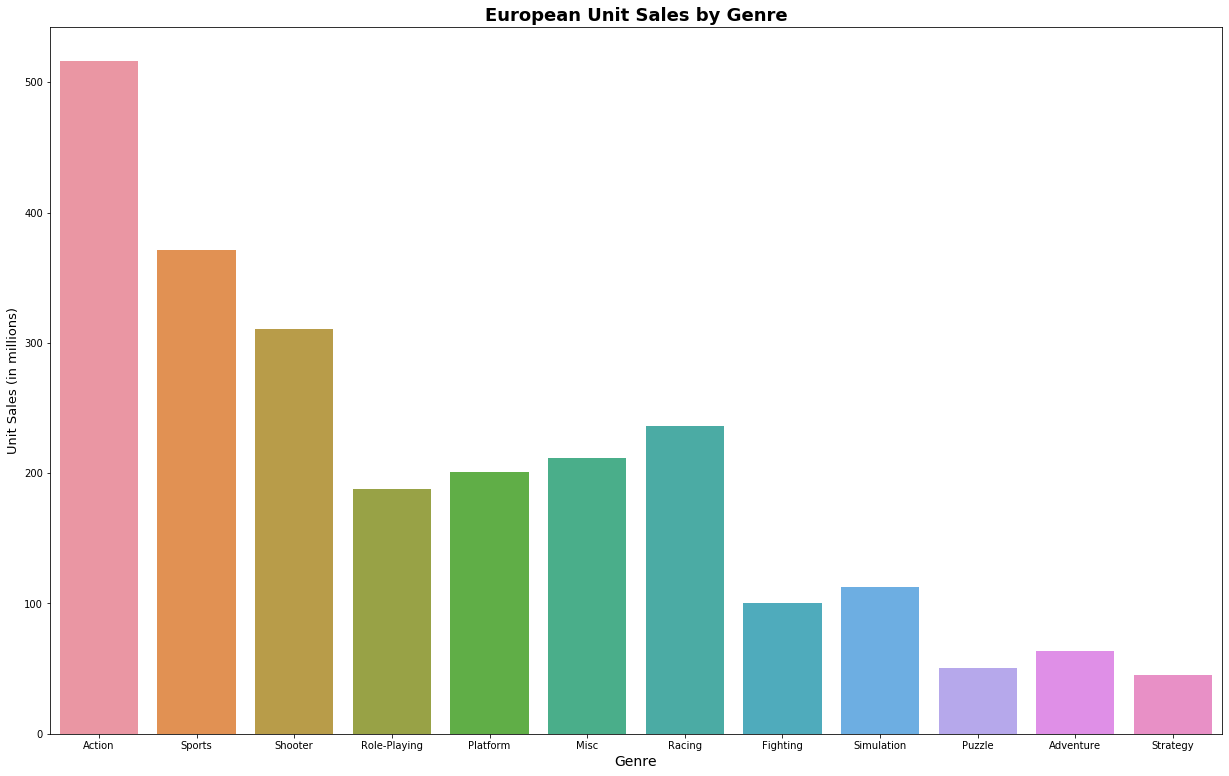

In [20]:
plt.figure(figsize=(21,13))
sns.barplot(x="Genre", y="EU_Sales", data=EUGSum, order=gr['Genre'])
plt.title('European Unit Sales by Genre', fontweight='bold',fontsize=18)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Unit Sales (in millions)',fontsize=13)
plt.show()

### Japan

In [21]:
#Groupby Platform, Aggregate the Global Sales
JPGSum = df.groupby('Genre').agg({'JP_Sales':'sum'}).reset_index()

In [22]:
#Groupby to order category for graph
#JPS = df.groupby(["Genre"])['JP_Sales'].aggregate(np.mean).reset_index().sort_values('JP_Sales', ascending=False)

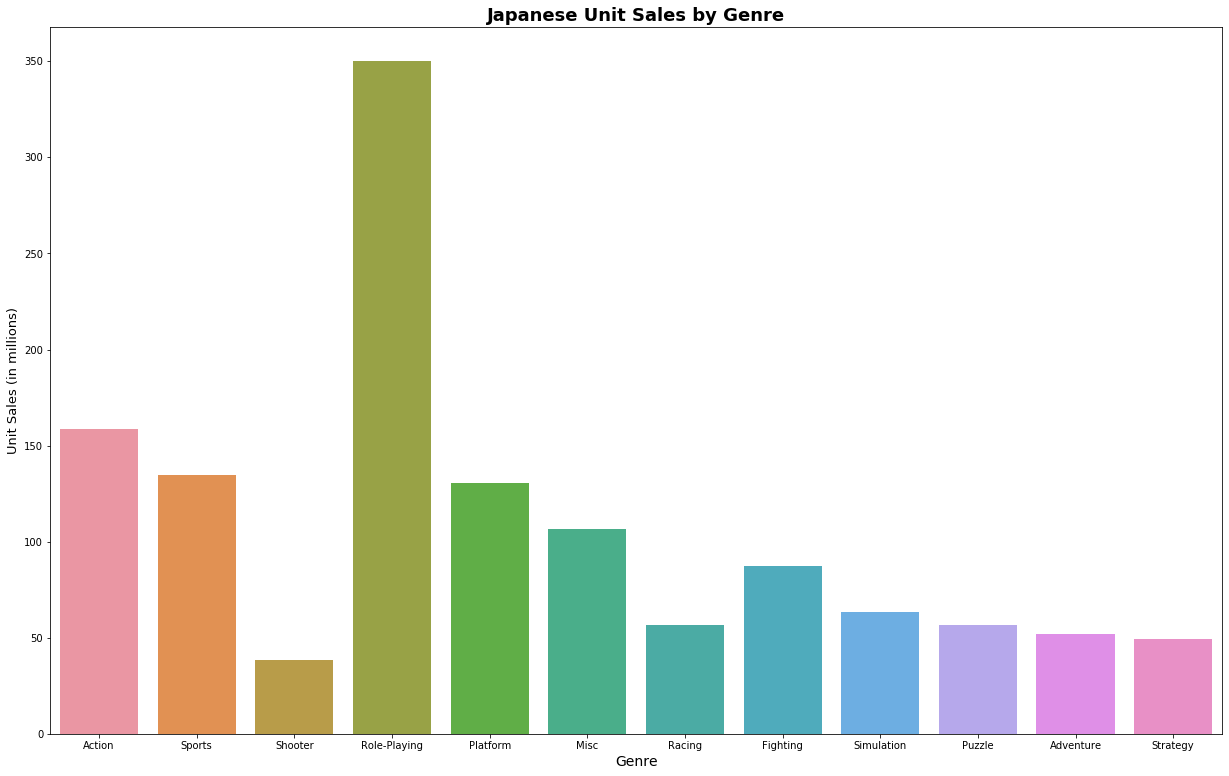

In [23]:
plt.figure(figsize=(21,13))
sns.barplot(x="Genre", y="JP_Sales", data=JPGSum, order=gr['Genre'])
plt.title('Japanese Unit Sales by Genre', fontweight='bold',fontsize=18)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Unit Sales (in millions)',fontsize=13)
plt.show()

### Rest of the World

In [24]:
#Groupby Platform, Aggregate the Global Sales
OGSum = df.groupby('Genre').agg({'Other_Sales':'sum'}).reset_index()

In [25]:
#Groupby to order category for graph
#OtS = df.groupby(["Genre"])['Other_Sales'].aggregate(np.mean).reset_index().sort_values('Other_Sales', ascending=False)

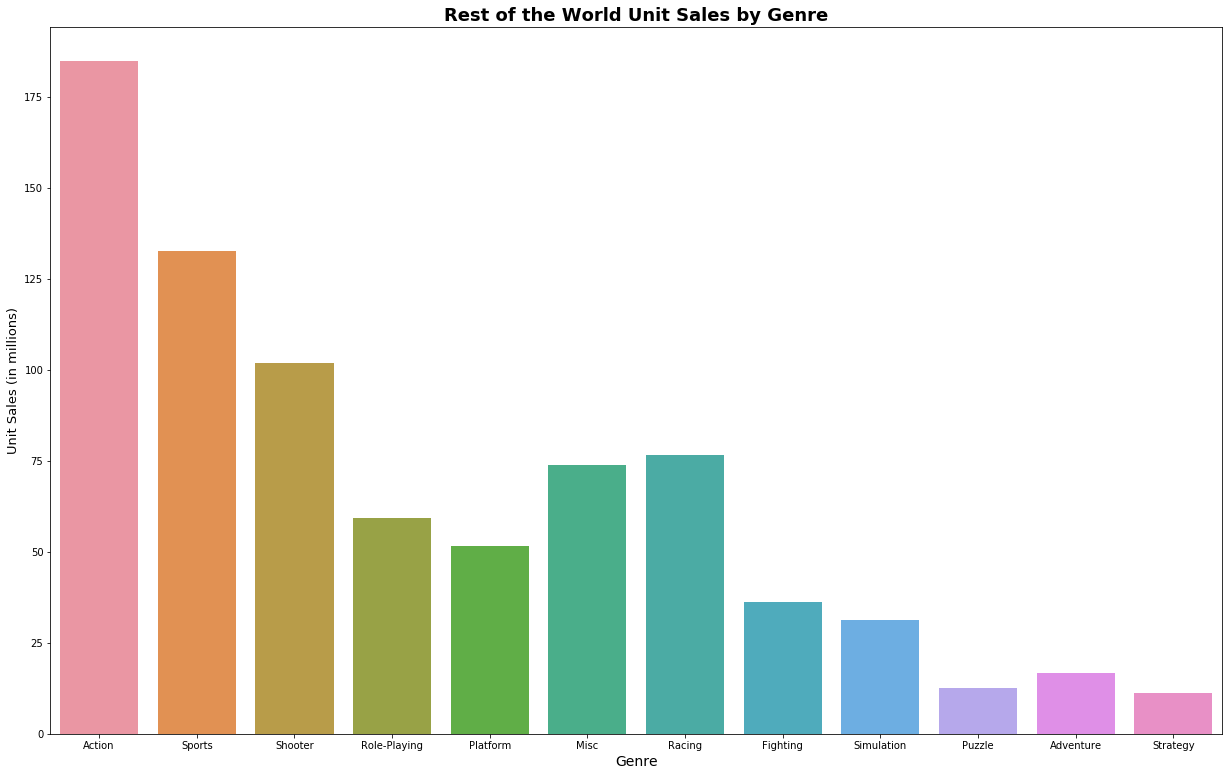

In [26]:
plt.figure(figsize=(21,13))
sns.barplot(x="Genre", y="Other_Sales", data=OGSum, order=gr['Genre'])
plt.title('Rest of the World Unit Sales by Genre', fontweight='bold',fontsize=18)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Unit Sales (in millions)',fontsize=13)
plt.show()

# Question 3: Which Platforms are most successful in terms of their title's Global Sales?

In [27]:
#Groupby Platform, Aggregate the Global Sales and Sort by Global Sales
PlatSum = data.groupby('Platform').agg({'Global_Sales':'sum'}).reset_index()
PLatSum = PlatSum.sort_values(by=['Global_Sales'], ascending=False)

In [28]:
#Groupby to order category for graph
pls = PlatSum.groupby(["Platform"])['Global_Sales'].aggregate(np.mean).reset_index().sort_values('Global_Sales', ascending=False)

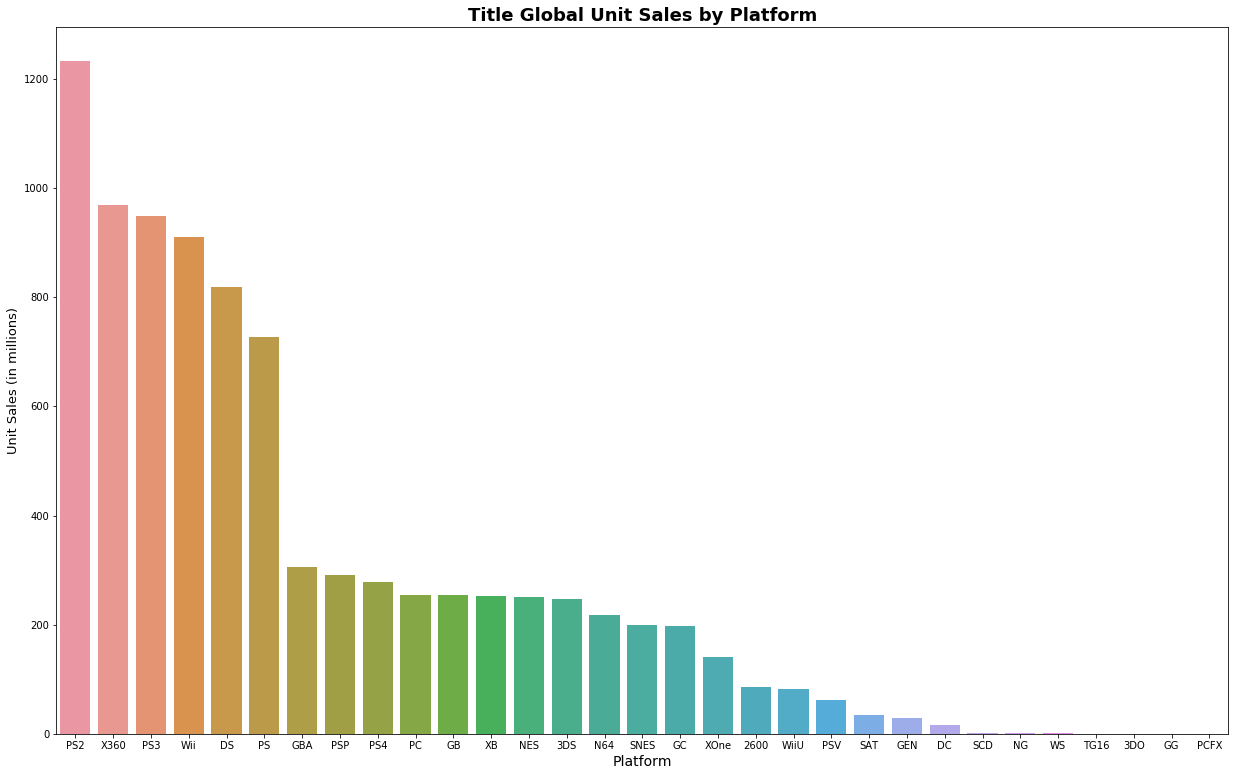

In [29]:
#Plot the Graph
plt.figure(figsize=(21,13))
sns.barplot(x="Platform", y="Global_Sales", data=PlatSum, order=pls['Platform'])
plt.title('Title Global Unit Sales by Platform', fontweight='bold',fontsize=18)
plt.xlabel('Platform',fontsize=14)
plt.ylabel('Unit Sales (in millions)',fontsize=13)
plt.show()

# Question 4: Who are the top 15 Publishers in terms of Global Sales and how many units have they sold?

In [30]:
#Groupby Publisher, Aggregate the Global Sales and Sort by Global Sales
PubSum = df.groupby('Publisher').agg({'Global_Sales':'sum'}).reset_index()
PubSum = PubSum.sort_values(by=['Global_Sales'], ascending=False)

In [31]:
#Groupby to order category for graph
pus = PubSum.groupby(["Publisher"])['Global_Sales'].aggregate(np.mean).nlargest(15).reset_index().sort_values('Global_Sales', ascending=False)

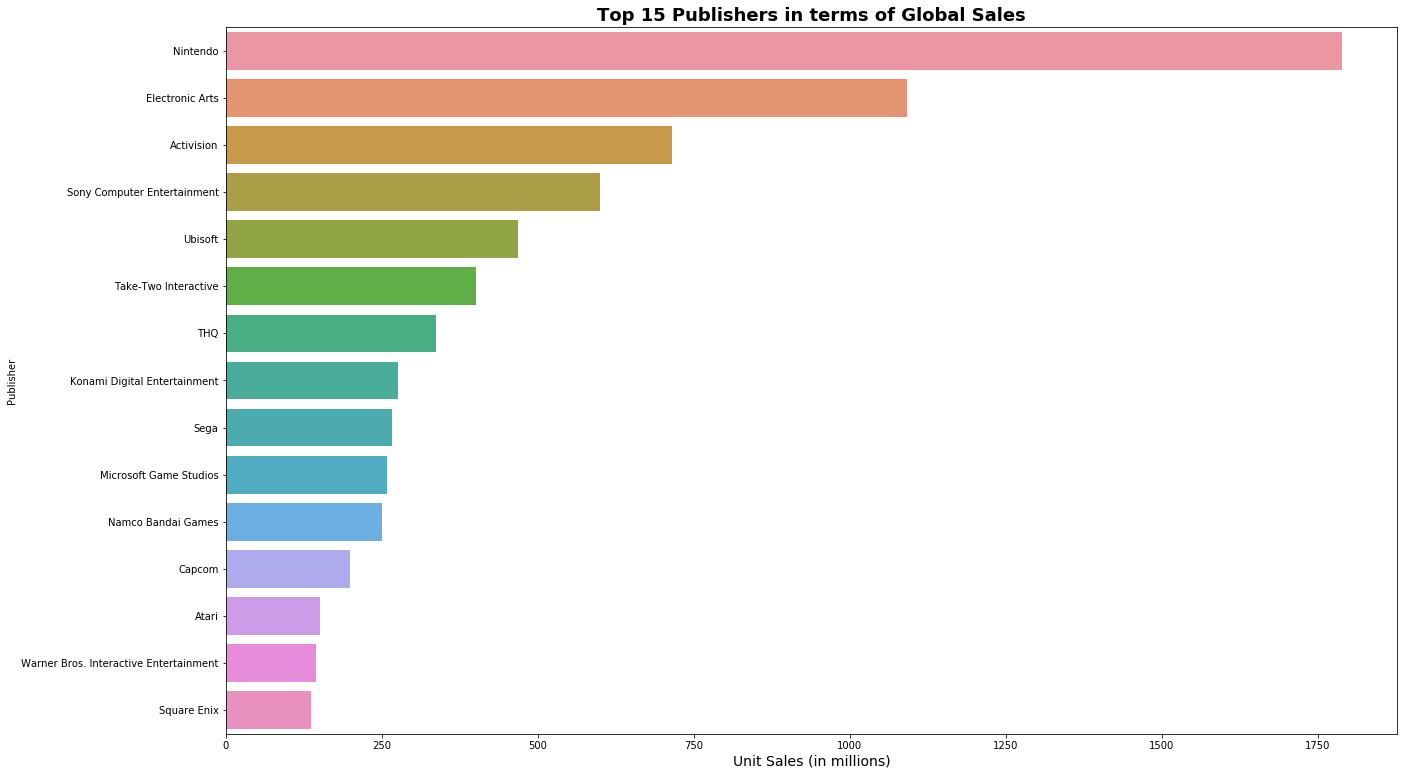

In [32]:
#Plot Graph
plt.figure(figsize=(21,13))
sns.barplot(x="Global_Sales", y='Publisher', data=PubSum, orient='h', order=pus["Publisher"], ci=None)
plt.title('Top 15 Publishers in terms of Global Sales', fontweight='bold',fontsize=18)
plt.xlabel('Unit Sales (in millions)',fontsize=14)
plt.show()

# Question 5: Which Games have sold the most units?

In [33]:
#Top 25 rows in terms of Global_Sales
top25g = df.nlargest(25,['Global_Sales'])

In [34]:
#Groupby to order category for graph
ns = top25g.groupby(["Name"])['Global_Sales'].aggregate(np.mean).reset_index().sort_values('Global_Sales', ascending=False)

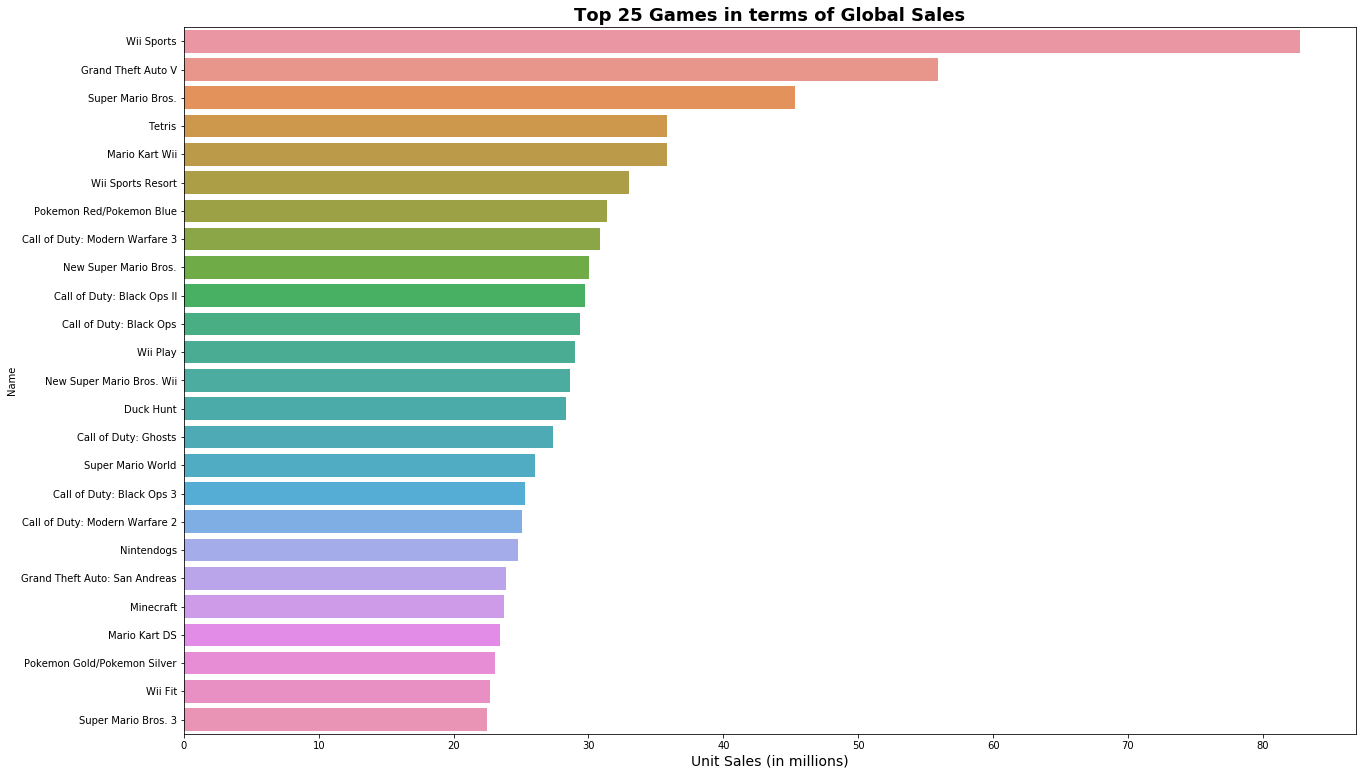

In [35]:
#Plot Graph
plt.figure(figsize=(21,13))
sns.barplot(x="Global_Sales", y="Name", data=top25g, orient='h', order=ns["Name"], ci=None)
plt.title('Top 25 Games in terms of Global Sales', fontweight='bold',fontsize=18)
plt.xlabel('Unit Sales (in millions)',fontsize=14)
plt.show()

# Question 6: Which years sold the most games?

In [36]:
#Groupby Year, Aggregate the Global Sales
YearSum = df.groupby('Year').agg({'Global_Sales':'sum'}).reset_index()

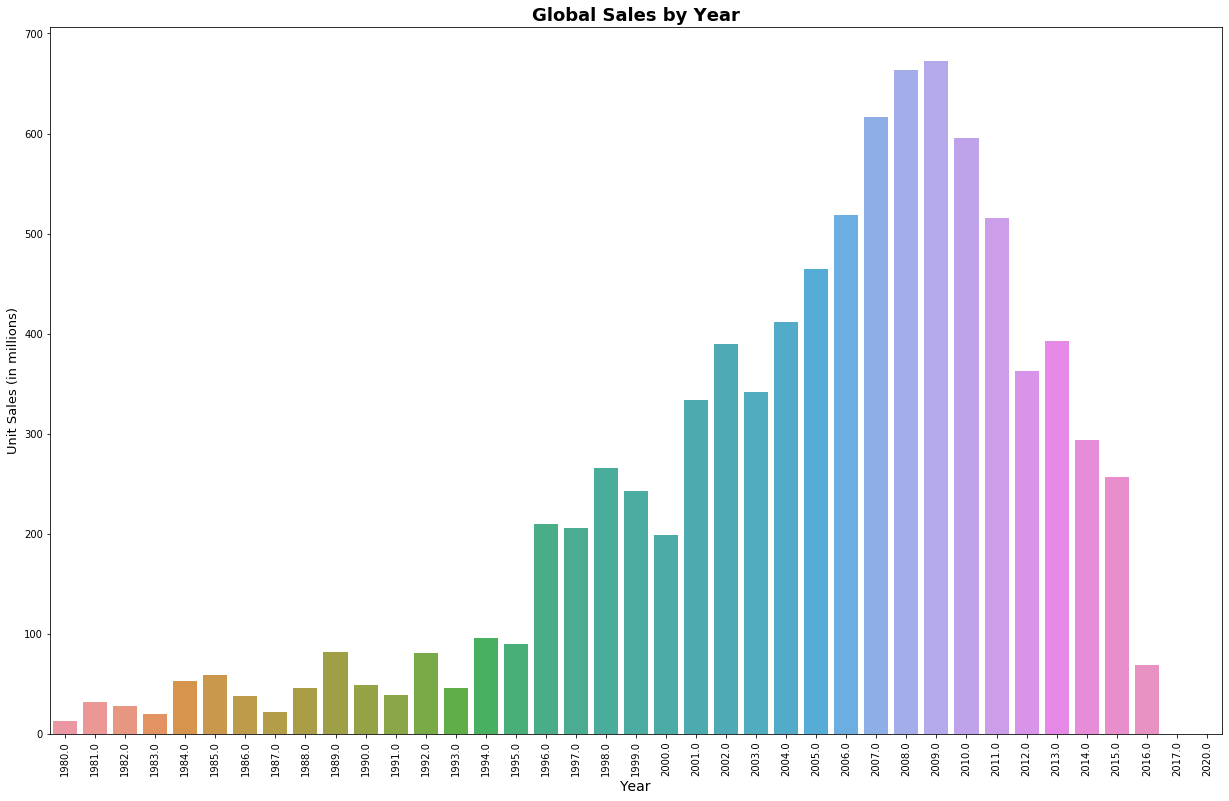

In [37]:
plt.figure(figsize=(21,13))
sns.barplot(x="Year", y='Global_Sales', data=YearSum)
plt.title('Global Sales by Year', fontweight='bold',fontsize=18)
plt.xlabel('Year',fontsize=14)
plt.xticks(rotation='vertical')
plt.ylabel('Unit Sales (in millions)',fontsize=13)
plt.show()

## Question 7: Publisher by Year

In [52]:
top_publisher =  data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
# top_publisher_cou

In [53]:
publisher= top_publisher_count['Publisher']

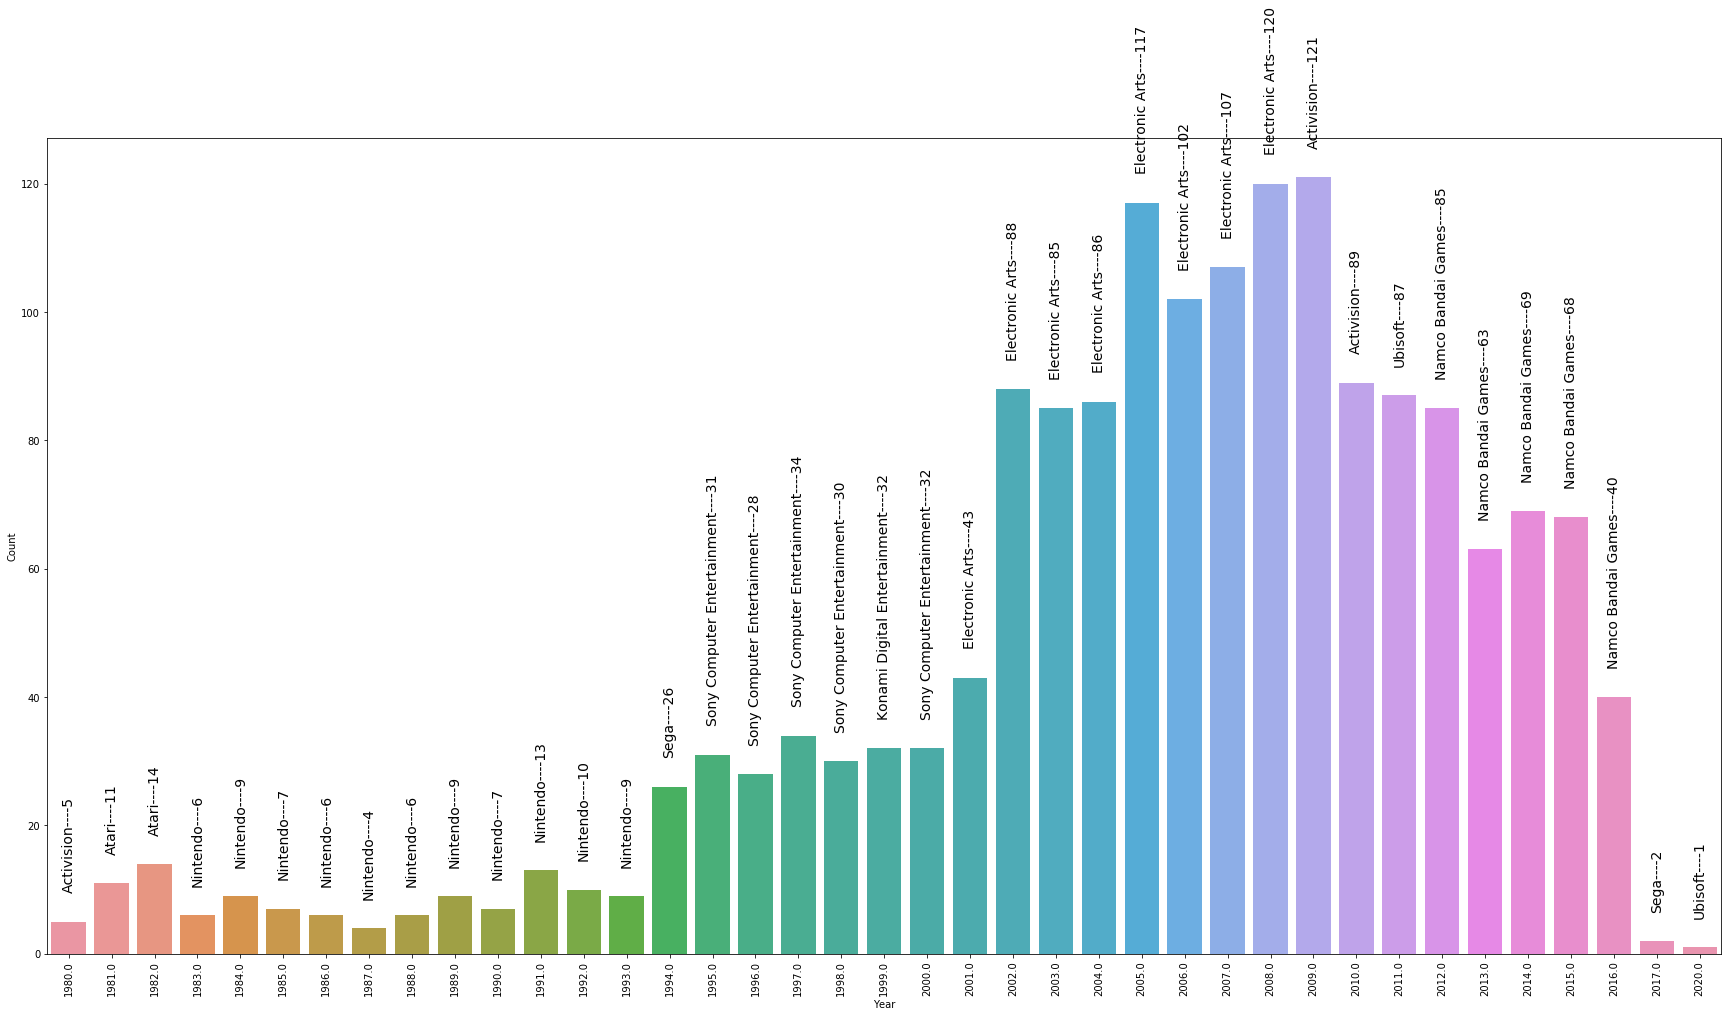

In [55]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

## Question 8: Genre by Year

In [42]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

In [43]:
genre = year_max_genre['Genre'].values

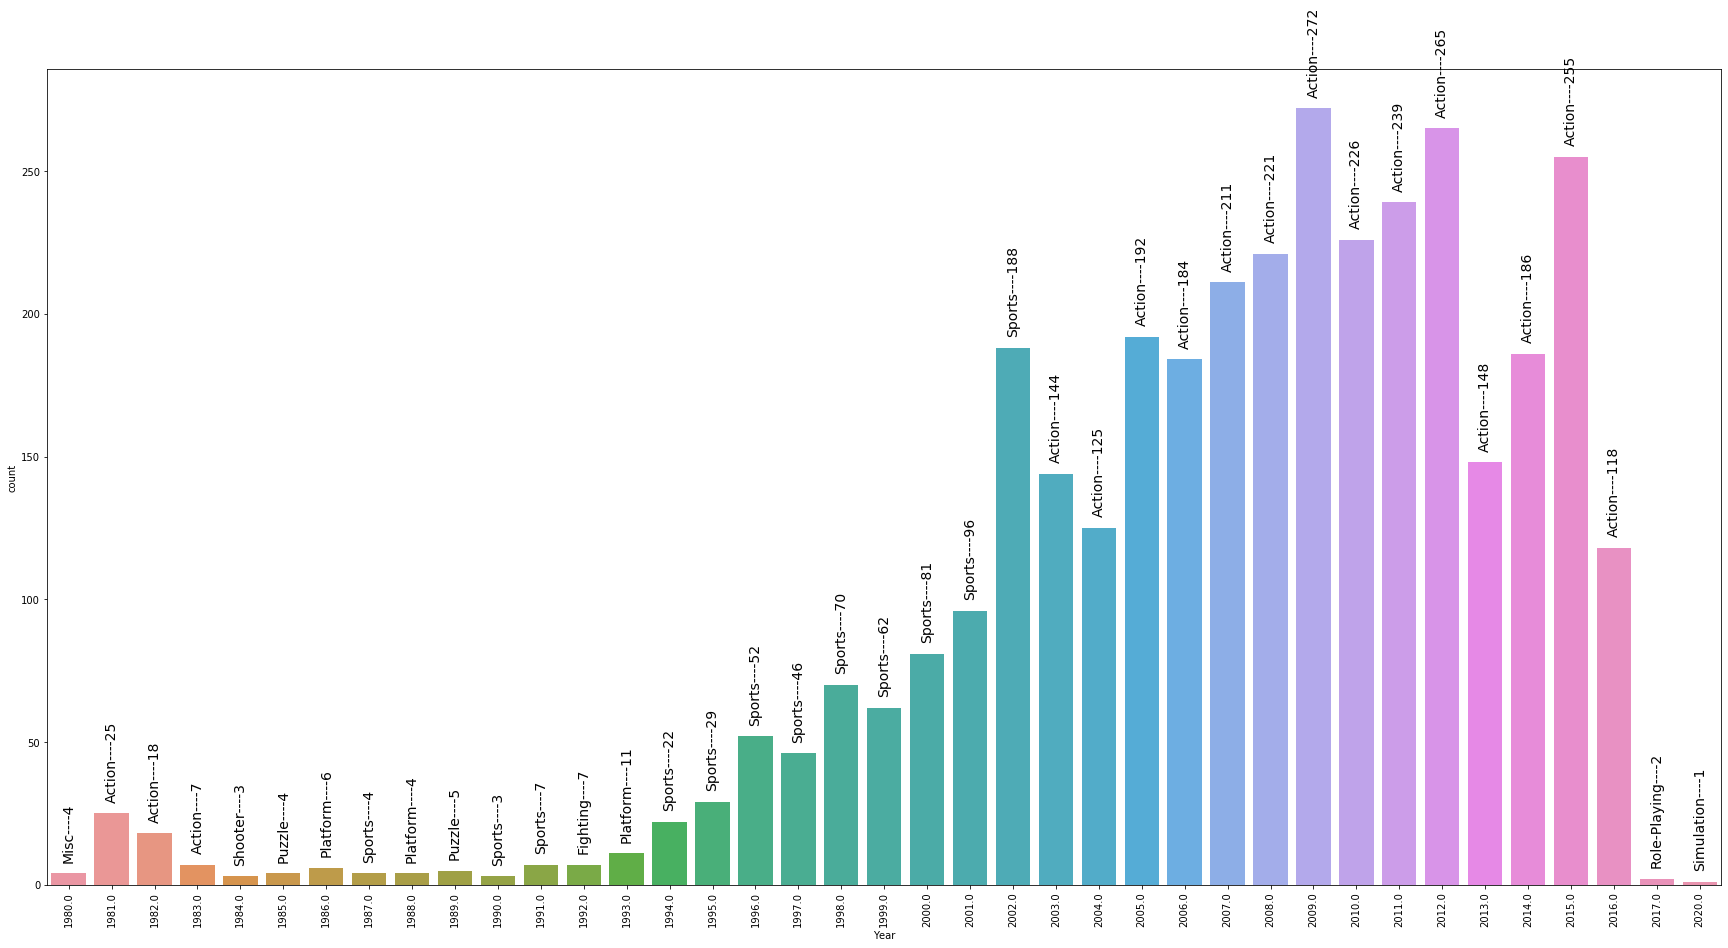

In [44]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()